In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [22]:
#load the data
data=pd.read_csv("../../data/01-modified-data/cleaned_supervised_data.csv")
y=data["label"]
data


,text,location,friends_count,followers_count,screen_name,retweet_count,favorite_count,label,description
0,is that you tome hanks how about we keep am...,NaN,13006,31014,helen henning,763,4208,0,#ULTRA MAGA...#KAG...let's have some fun...sad...
1,after the dreadful hurricane in florida vp k...,London,31163,33758,David Atherton,198,297,0,"Libertarian, free markets, free speech. ""Selfi..."
2,heartbreaking iranian father who promised to ...,Nature,4441,9363,Shukri Hamk,9589,30927,0,-Survivor of #YazidiGenocide No.74 By #ISIS. -...
3,my dad just sent me this video from naples flo...,NaN,70,29,the worlds foremost authority,933,3681,0,i like to think i’m funny
4,omg so all funerals due on the th have been c...,NaN,4795,3928,Carolyn Brown,3381,26141,0,"Feminist, Cymraes and European! 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🏴󠁧󠁢󠁳󠁣..."
...,...,...,...,...,...,...,...,...,...
524,low levels of immunity as well as the relaxati...,"Washington, D.C.",710,170383,usnews,1,4,1,Life’s decisions made here since 1933. Breakin...
525,the number of people filing for first time une...,"Washington, D.C.",710,170383,usnews,1,2,1,Life’s decisions made here since 1933. Breakin...
526,the circuit on wednesday outlined that the br...,"Washington, D.C.",710,170383,usnews,1,2,1,Life’s decisions made here since 1933. Breakin...
527,there will be plenty of opportunities for you ...,"Washington, D.C.",710,170383,usnews,1,1,1,Life’s decisions made here since 1933. Breakin...


In [23]:
#count the frequency of words
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(data.text)
X = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out())
#X["favorite_count"]=data["favorite_count"]
X["retweet_count"]=data["retweet_count"]

In [24]:
#divide the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [25]:
# build and fit the model
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)


In [26]:
#calculate the accuracy rate
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values,y_predict)


0.9622641509433962

In [27]:
#calculate the confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
cf=metrics.confusion_matrix(y_test.values, y_predict)
cf

array([[  8,   3],
       [  5, 196]], dtype=int64)

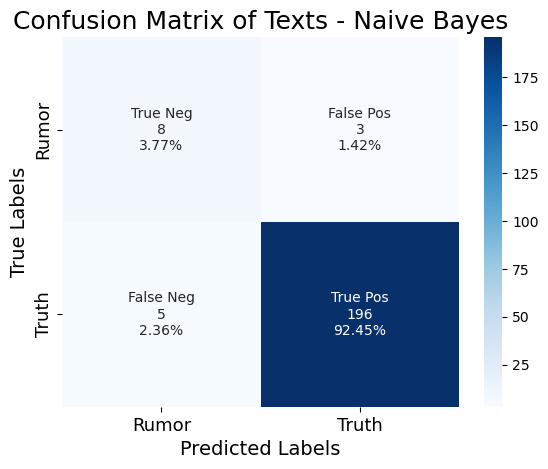

In [28]:
# visualize the confusion Matirx
# customize the anno
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#plot the heatmap
fig=sns.heatmap(cf, annot=labels, fmt="", cmap='Blues')
plt.title("Confusion Matrix of Texts - Naive Bayes",fontsize=18)
fig.set_xticklabels(["Rumor","Truth"],fontsize=13)
fig.set_yticklabels(["Rumor","Truth"],fontsize=13)
fig.set_xlabel("Predicted Labels",fontsize=14)
fig.set_ylabel("True Labels",fontsize=14)
plt.show()
heatmap = fig.get_figure()
# save the picture
heatmap.savefig("../../501-project-website/images/confusion_matirx_text_naive_bayes")


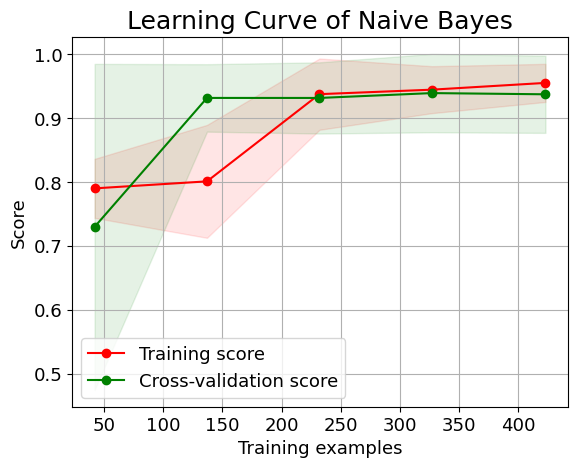

In [29]:
#plot the learning Curve
import scikitplot as skplt
probas_list=[y_predict]
clf_names=["Naive Bayes"]
a=skplt.estimators.plot_learning_curve(clf, X, y,text_fontsize=13)
plt.title("Learning Curve of Naive Bayes",fontsize=18)
plt.show()
curve=a.get_figure()
curve.savefig("../../501-project-website/images/learning_curve_text_naive_bayes")

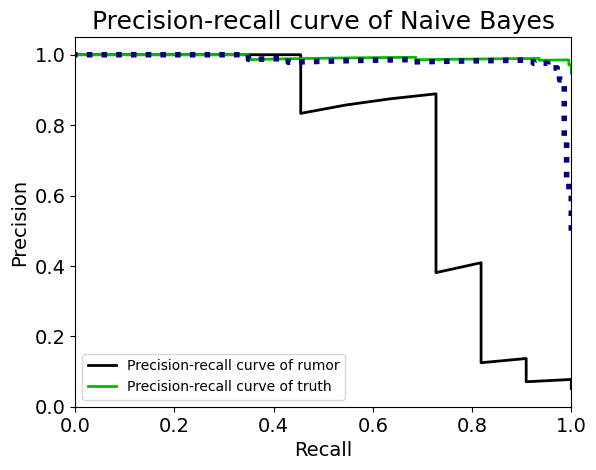

In [30]:
#plot the Precision-recall curve
skplt.metrics.plot_precision_recall(y_true=y_test, y_probas=predicted_probas,text_fontsize=14)
plt.legend(['Precision-recall curve of rumor',"Precision-recall curve of truth"])
plt.title("Precision-recall curve of Naive Bayes",fontsize=18)
plt.xlabel("Recall",fontsize=14)
plt.ylabel("Precision",fontsize=14)
plt.savefig("../../501-project-website/images/PR_curve_naive_bayes")